In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file = "benchmark_2024-04-03_00-05-02.csv"
df = pd.read_csv(file, sep=",")

In [6]:
df

,Epochs,Run,Time,Best Action,Best Residuum,Best Action global optimum,Best Residuum global optimum,Residuum Average
0,1000.0,0,3.174,[-1.12131631 1.46963942],2.481056e-06,[1.01147866 1.00551689],0.012736,433.074577
1,1000.0,1,2.907,[-0.68742484 0.64195198],4.311048e-05,[0.9548077 0.99278909],0.045764,445.237802
2,1000.0,2,3.104,[-0.5903334 0.50771141],3.405671e-06,[1.06315935 1.01493669],0.064902,458.479861
3,1000.0,3,3.171,[0.54230106 0.34038109],2.711841e-05,[0.99361432 1.02724671],0.027985,433.351489
4,1000.0,4,3.246,[0.25709009 0.13924211],1.309179e-04,[0.98532677 1.00570107],0.015742,457.715465
...,...,...,...,...,...,...,...,...
121,90000.0,2,195.978,[-1.19278657 1.64200437],1.987742e-08,[0.99259645 1.0033288 ],0.008117,457.930211
122,90000.0,3,199.044,[-0.4006744 0.30055496],2.751663e-07,[0.99815583 1.00296247],0.003490,460.484305
123,90000.0,4,200.633,[-0.4731788 0.3712436],7.581875e-08,[0.99784309 0.99906868],0.002349,454.296819
124,90000.0,5,205.616,[0.84187317 0.72459823],1.232939e-07,[1.00418067 1.00166309],0.004499,454.952373


In [17]:
# group by epochs
df_grouped_res = df.groupby("Epochs")["Best Residuum global optimum"].apply(list)
df_grouped_time = df.groupby("Epochs")["Time"].apply(list)
grouped_dict_res = df_grouped_res.to_dict()
grouped_dict_time = df_grouped_time.to_dict()


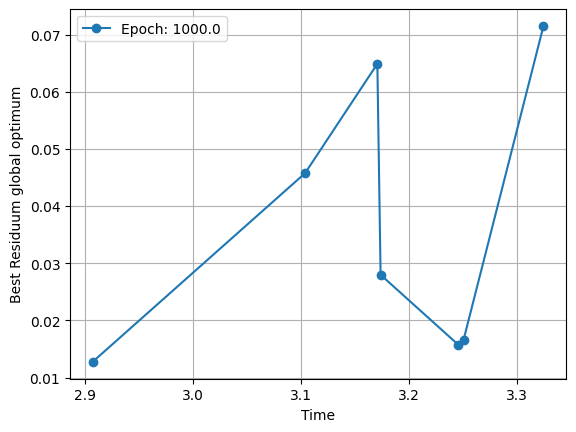

In [22]:
# plot
for (epoch, res_list), (epoch_1, time_list) in zip(grouped_dict_res.items(), grouped_dict_time.items()):
    if epoch == epoch_1:  # Ensure we're plotting data for the same epoch
        plt.plot(sorted(time_list), res_list, label=f"Epoch: {epoch}", marker="o")
    break


plt.xlabel('Time')
plt.ylabel('Best Residuum global optimum')
plt.legend()
plt.grid()
plt.show()